In [1]:
using DifferentialEquations
using ParameterizedFunctions

type SSNParam
    w
    h
    τ
    V_rest
    k
    n
end

ReLU(x) = x < 0.0 ? 0.0 : x

function ssn_ode(t, u, param, du)
    w = param.w
    h = param.h
    τ = param.τ
    V_rest = param.V_rest
    n = param.n
    k = param.k
    du .= ((- u .+ V_rest) .+ w * (k .* ReLU.(u .- V_rest).^n) .+ h) ./ τ
end

ssn_ode (generic function with 1 method)

In [14]:
w = [1.25 -0.65
    1.2  -0.5]

2×2 Array{Float64,2}:
 1.25  -0.65
 1.2   -0.5 

In [15]:
#τ = [1, 0.1] #This gives instable behavior
τ = [0.2, 0.1]

2-element Array{Float64,1}:
 0.2
 0.1

In [16]:
h = [0.1, 0.1]

2-element Array{Float64,1}:
 0.1
 0.1

In [17]:
ssn = ParameterizedFunction(ssn_ode, SSNParam(
    w,
    τ,
    h,
    -70,   # V_rest
    0.3,  # k
    2,   # n
))

(::ParameterizedFunction) (generic function with 2 methods)

In [18]:
#ode = ODEProblem(ssn, ones(2), (0.0, 5.0))
ode = ODEProblem(ssn, [-80.0, 60.0], (0.0, 5.0))

DiffEqBase.ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 5.0)
u0: [-80.0, 60.0]

In [19]:
sol = solve(ode);

In [20]:
using Plots


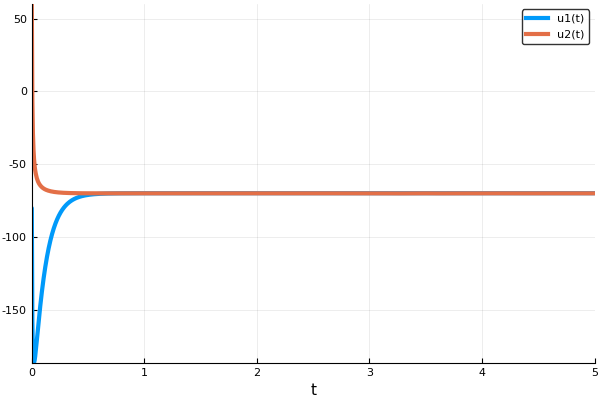

In [21]:
plot(sol, vars=[1, 2])

In [ ]:
workspace() 